In [136]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [137]:
import pandas as pd

data_path = '../titanic/'

train = pd.read_csv(data_path + 'train.csv' , index_col = 'PassengerId')
test = pd.read_csv(data_path + 'test.csv' , index_col = 'PassengerId')
submission = pd.read_csv(data_path + 'gender_submission.csv' , index_col= 'PassengerId')

In [138]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [140]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [141]:
submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [142]:
all_data = pd.concat([train,test]) # 훈련 데이터와 테스트 데이터 합치기
# all_data = all_data.drop('Survived' , axis = 1) # 타깃값 제거
all_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


## NAME 전처리

In [143]:

all_data['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [144]:
all_data["Occupation"] = all_data["Name"].str.split(",|\\.").str[1].str.strip()

# 직업 정보를 출력합니다.
print(all_data["Occupation"])

PassengerId
1           Mr
2          Mrs
3         Miss
4          Mrs
5           Mr
         ...  
1305        Mr
1306      Dona
1307        Mr
1308        Mr
1309    Master
Name: Occupation, Length: 1309, dtype: object


In [145]:
all_data["Name"].str.split(",|\\.")

PassengerId
1                             [Braund,  Mr,  Owen Harris]
2       [Cumings,  Mrs,  John Bradley (Florence Briggs...
3                              [Heikkinen,  Miss,  Laina]
4        [Futrelle,  Mrs,  Jacques Heath (Lily May Peel)]
5                            [Allen,  Mr,  William Henry]
                              ...                        
1305                               [Spector,  Mr,  Woolf]
1306                     [Oliva y Ocana,  Dona,  Fermina]
1307                     [Saether,  Mr,  Simon Sivertsen]
1308                              [Ware,  Mr,  Frederick]
1309                         [Peter,  Master,  Michael J]
Name: Name, Length: 1309, dtype: object

In [146]:
a= all_data['Occupation'].unique()
a

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [147]:
occupation_counts = all_data["Occupation"].value_counts()

a = pd.concat([occupation_counts] , axis = 1)
a = a.reset_index()
a
# 계산된 결과를 데이터프레임으로 변환합니다.
# occupation_counts_df = occupation_counts.to_frame(name="Count")
#
# # 결과를 출력합니다.
# occupation_counts_df

,index,Occupation
0,Mr,757
1,Miss,260
2,Mrs,197
3,Master,61
4,Rev,8
5,Dr,8
6,Col,4
7,Mlle,2
8,Major,2
9,Ms,2


In [148]:
# t = a.values.tolist()
t = a["index"].to_numpy().tolist()[:6]
t

['Mr', 'Miss', 'Mrs', 'Master', 'Rev', 'Dr']

In [149]:
for i in t:

    print(all_data[all_data["Name"].str.contains(i)])

             Survived  Pclass  \
PassengerId                     
1                 0.0       3   
2                 1.0       1   
4                 1.0       1   
5                 0.0       3   
6                 0.0       3   
...               ...     ...   
1299              NaN       1   
1303              NaN       1   
1305              NaN       3   
1307              NaN       3   
1308              NaN       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                             Moran, Mr. James    male   NaN   
...       

In [150]:
all_data['Name'] =all_data['Occupation']

In [151]:
all_data['Name'] = all_data['Name'].apply(lambda x: 'baby' if x not in t else x)
all_data


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Occupation
PassengerId,,,,,,,,,,,,
1,0.0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1.0,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1.0,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1.0,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0.0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1306,NaN,1,baby,female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
1307,NaN,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr


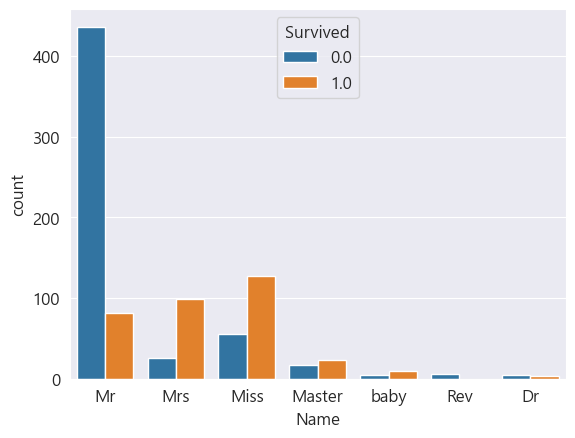

In [152]:
ax = sns.countplot(x='Name',  hue = 'Survived' , data = all_data)
plt.show()

## Cabin 전처리 해보기

In [153]:
all_data['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64

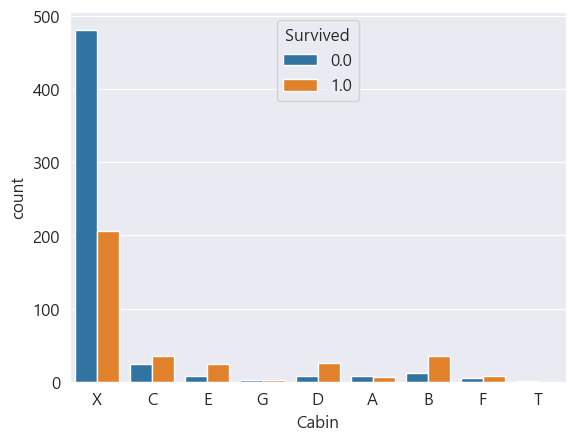

In [154]:
all_data['Cabin'] = all_data['Cabin'].fillna('X')

all_data['Cabin'] = all_data['Cabin'].apply(lambda x: x[0])

# all_data['Cabin'] = all_data['Cabin'].replace({'G':'X', 'T':'X'})

ax = sns.countplot(x='Cabin',  hue = 'Survived' , data = all_data)
plt.show()


## Embarked 확인

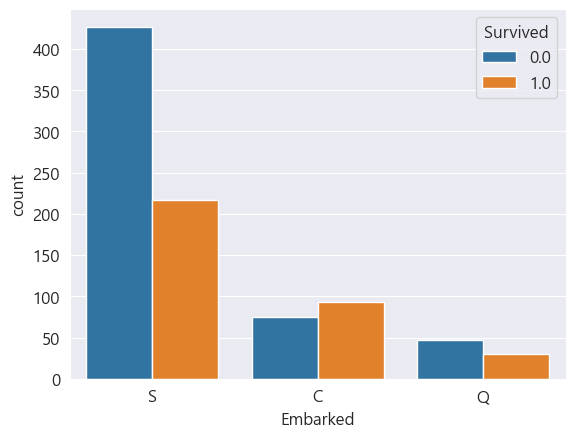

In [155]:
# all_data['Embarked'] = all_data['Cabin'].fillna('X')
#
# all_data['Cabin'] = all_data['Cabin'].apply(lambda x: x[0])

# all_data['Cabin'] = all_data['Cabin'].replace({'G':'X', 'T':'X'})

ax = sns.countplot(x='Embarked',  hue = 'Survived' , data = all_data)
plt.show()

In [156]:
from sklearn.preprocessing import LabelEncoder

# 명목형 변수 데이터
a= all_data['Cabin']
# LabelEncoder 인스턴스 생성
encoder = LabelEncoder()

# 데이터를 변환하여 숫자로 인코딩
encoded_labels = encoder.fit_transform(a)

all_data['Cabin'] = encoded_labels
all_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Occupation
PassengerId,,,,,,,,,,,,
1,0.0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,8,S,Mr
2,1.0,1,Mrs,female,38.0,1,0,PC 17599,71.2833,2,C,Mrs
3,1.0,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,8,S,Miss
4,1.0,1,Mrs,female,35.0,1,0,113803,53.1000,2,S,Mrs
5,0.0,3,Mr,male,35.0,0,0,373450,8.0500,8,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,8,S,Mr
1306,NaN,1,baby,female,39.0,0,0,PC 17758,108.9000,2,C,Dona
1307,NaN,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,8,S,Mr


In [157]:
all_data[['Cabin' , 'Survived']]

,Cabin,Survived
PassengerId,,
1,8,0.0
2,2,1.0
3,8,1.0
4,2,1.0
5,8,0.0
...,...,...
1305,8,NaN
1306,2,NaN
1307,8,NaN


In [158]:
all_data[['Cabin' , 'Survived']].corr()

,Cabin,Survived
Cabin,1.000000,-0.301116
Survived,-0.301116,1.000000


In [159]:
all_data['Cabin'] = all_data['Cabin'].astype('int64')
all_data['Cabin'].dtype

dtype('int64')

In [160]:
all_data = all_data.drop('Survived' , axis = 1) # 타깃값 제거

all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Occupation
PassengerId,,,,,,,,,,,
1,3,Mr,male,22.0,1,0,A/5 21171,7.2500,8,S,Mr
2,1,Mrs,female,38.0,1,0,PC 17599,71.2833,2,C,Mrs
3,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,8,S,Miss
4,1,Mrs,female,35.0,1,0,113803,53.1000,2,S,Mrs
5,3,Mr,male,35.0,0,0,373450,8.0500,8,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,8,S,Mr
1306,1,baby,female,39.0,0,0,PC 17758,108.9000,2,C,Dona
1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,8,S,Mr


## Fare , Embarked 전처리 하기

In [161]:
all_data[all_data['Fare'] == 0]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Occupation
PassengerId,,,,,,,,,,,
180,3,Mr,male,36.0,0,0,LINE,0.0,8,S,Mr
264,1,Mr,male,40.0,0,0,112059,0.0,1,S,Mr
272,3,Mr,male,25.0,0,0,LINE,0.0,8,S,Mr
278,2,Mr,male,NaN,0,0,239853,0.0,8,S,Mr
303,3,Mr,male,19.0,0,0,LINE,0.0,8,S,Mr
414,2,Mr,male,NaN,0,0,239853,0.0,8,S,Mr
467,2,Mr,male,NaN,0,0,239853,0.0,8,S,Mr
482,2,Mr,male,NaN,0,0,239854,0.0,8,S,Mr
598,3,Mr,male,49.0,0,0,LINE,0.0,8,S,Mr


In [162]:
all_data['Embarked'] = all_data['Embarked'].fillna(all_data['Embarked'].mode().iloc[0])

fare_medians = all_data[all_data['Fare'] != 0].groupby('Pclass')['Fare'].median()
# fare_medians
# Fare 값이 0인 데이터를 PClass 등급에 따라 중앙값으로 채우기
for i, row in all_data.iterrows():
    if row['Fare'] == 0 or row['Fare'] == 'NaN':
        all_data.at[i, 'Fare'] = fare_medians[row['Pclass']]
all_data['Fare'] = all_data['Fare'].fillna(all_data['Fare'].mode().iloc[0])
# 결과 확인
all_data.loc[816:824]
all_data.drop('Occupation', axis=1, inplace=True)

all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,Mr,male,22.0,1,0,A/5 21171,7.2500,8,S
2,1,Mrs,female,38.0,1,0,PC 17599,71.2833,2,C
3,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,8,S
4,1,Mrs,female,35.0,1,0,113803,53.1000,2,S
5,3,Mr,male,35.0,0,0,373450,8.0500,8,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,8,S
1306,1,baby,female,39.0,0,0,PC 17758,108.9000,2,C
1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,8,S


In [163]:

all_data[all_data['Fare'] == 0]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


In [164]:
all_data.drop(all_data[['Ticket']] , axis = 1 , inplace=True)

all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,Mr,male,22.0,1,0,7.2500,8,S
2,1,Mrs,female,38.0,1,0,71.2833,2,C
3,3,Miss,female,26.0,0,0,7.9250,8,S
4,1,Mrs,female,35.0,1,0,53.1000,2,S
5,3,Mr,male,35.0,0,0,8.0500,8,S
...,...,...,...,...,...,...,...,...,...
1305,3,Mr,male,NaN,0,0,8.0500,8,S
1306,1,baby,female,39.0,0,0,108.9000,2,C
1307,3,Mr,male,38.5,0,0,7.2500,8,S


In [165]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Cabin     1309 non-null   int64  
 8   Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 134.6+ KB


In [166]:

binary_col = []
object_col = []

for i in all_data.columns.tolist():
    if all_data[i].dtype in ['int64' , 'float64']:
        binary_col.append(i)
    else:
        object_col.append(i)

In [167]:
all_data[object_col]

,Name,Sex,Embarked
PassengerId,,,
1,Mr,male,S
2,Mrs,female,C
3,Miss,female,S
4,Mrs,female,S
5,Mr,male,S
...,...,...,...
1305,Mr,male,S
1306,baby,female,C
1307,Mr,male,S


In [168]:

all_data[binary_col]

,Pclass,Age,SibSp,Parch,Fare,Cabin
PassengerId,,,,,,
1,3,22.0,1,0,7.2500,8
2,1,38.0,1,0,71.2833,2
3,3,26.0,0,0,7.9250,8
4,1,35.0,1,0,53.1000,2
5,3,35.0,0,0,8.0500,8
...,...,...,...,...,...,...
1305,3,NaN,0,0,8.0500,8
1306,1,39.0,0,0,108.9000,2
1307,3,38.5,0,0,7.2500,8


In [169]:
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder

encoder = OneHotEncoder() # 원-핫 인코더 생성
le = LabelEncoder()
for i in range(len(object_col)):
    # f_encoded = pd.get_dummies(all_data, columns=[object_col[i]])
    all_data_label_encoded = le.fit_transform(all_data[object_col[i]])
    all_data[object_col[i]] = all_data_label_encoded
all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,3,1,22.0,1,0,7.2500,8,2
2,1,4,0,38.0,1,0,71.2833,2,0
3,3,2,0,26.0,0,0,7.9250,8,2
4,1,4,0,35.0,1,0,53.1000,2,2
5,3,3,1,35.0,0,0,8.0500,8,2
...,...,...,...,...,...,...,...,...,...
1305,3,3,1,NaN,0,0,8.0500,8,2
1306,1,6,0,39.0,0,0,108.9000,2,0
1307,3,3,1,38.5,0,0,7.2500,8,2


In [170]:
all_data.iloc[:len(train)]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,3,1,22.0,1,0,7.2500,8,2
2,1,4,0,38.0,1,0,71.2833,2,0
3,3,2,0,26.0,0,0,7.9250,8,2
4,1,4,0,35.0,1,0,53.1000,2,2
5,3,3,1,35.0,0,0,8.0500,8,2
...,...,...,...,...,...,...,...,...,...
887,2,5,1,27.0,0,0,13.0000,8,2
888,1,2,0,19.0,0,0,30.0000,1,2
889,3,2,0,NaN,1,2,23.4500,8,2


In [171]:
all_data[pd.isnull(all_data['Age'])]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
6,3,3,1,NaN,0,0,8.4583,8,1
18,2,3,1,NaN,0,0,13.0000,8,2
20,3,4,0,NaN,0,0,7.2250,8,0
27,3,3,1,NaN,0,0,7.2250,8,0
29,3,2,0,NaN,0,0,7.8792,8,1
...,...,...,...,...,...,...,...,...,...
1300,3,2,0,NaN,0,0,7.7208,8,1
1302,3,2,0,NaN,0,0,7.7500,8,1
1305,3,3,1,NaN,0,0,8.0500,8,2


In [172]:

num_train = len(train) # 훈련데이터 개수
print(num_train)

X_train = all_data[~pd.isnull(all_data['Age'])]
X_test = all_data[pd.isnull(all_data['Age'])]


X_train = X_train.drop(['Age'] , axis =1)
X_test = X_test.drop(['Age'] , axis =1)
train2 = all_data[~pd.isnull(all_data['Age'])]
y = train2['Age']
y

891


PassengerId
1       22.0
2       38.0
3       26.0
4       35.0
5       35.0
        ... 
1301     3.0
1303    37.0
1304    28.0
1306    39.0
1307    38.5
Name: Age, Length: 1046, dtype: float64

In [173]:
X_train

,Pclass,Name,Sex,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,3,1,1,0,7.2500,8,2
2,1,4,0,1,0,71.2833,2,0
3,3,2,0,0,0,7.9250,8,2
4,1,4,0,1,0,53.1000,2,2
5,3,3,1,0,0,8.0500,8,2
...,...,...,...,...,...,...,...,...
1301,3,2,0,1,1,13.7750,8,2
1303,1,4,0,1,0,90.0000,2,1
1304,3,2,0,0,0,7.7750,8,2


In [174]:
y

PassengerId
1       22.0
2       38.0
3       26.0
4       35.0
5       35.0
        ... 
1301     3.0
1303    37.0
1304    28.0
1306    39.0
1307    38.5
Name: Age, Length: 1046, dtype: float64

In [175]:
X_train[X_train['Fare'].isnull()==True]

,Pclass,Name,Sex,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,


In [176]:
X_train[X_train['Embarked'].isnull()==True]

,Pclass,Name,Sex,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,


## AGE 에 대해 NaN 값 처리

In [177]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train , y) # 모델 훈련

LinearRegression()

In [178]:
preds = linear_reg_model.predict(X_test)

preds =preds.clip(0,100)
preds.tolist()
preds

array([27.711, 34.001, 29.637, 26.89 , 18.662, 28.515, 41.046, 18.66 ,
       26.89 , 26.897, 28.517, 25.634, 18.66 , 22.74 , 40.797, 37.962,
       12.257, 28.515, 28.517, 18.661, 28.517, 28.517, 28.515, 28.514,
       16.674, 28.517, 27.705, 15.643, 28.164, 28.509, 28.523,  0.   ,
       42.576, 39.563,  9.684,  1.356, 32.403, 41.317, 28.381, 27.705,
       18.66 , 10.4  , 25.559, 28.515, 12.43 , 19.467, 15.771, 16.59 ,
       28.509, 41.207, 27.705, 18.66 , 39.612, 18.66 , 34.021, 41.085,
       37.962, 40.748, 18.66 , 23.564, 24.902, 28.517, 29.724, 10.4  ,
       14.52 , 41.208, 28.515, 29.196, 40.792, 26.89 , 18.662, 18.662,
       25.634, 29.637, 18.66 , 39.091, 28.515, 27.704, 12.43 , 28.515,
       27.696, 34.021, 31.263, 26.897, 28.509, 27.705, 29.196, 28.517,
       26.487, 28.517, 41.366, 27.705, 28.517, 34.021, 27.704, 28.509,
       41.337, 34.021, 12.43 , 26.487, 26.96 , 28.585, 18.659, 39.569,
       28.517, 27.864, 26.89 , 26.89 , 42.602, 26.89 , 28.233, 28.579,
      

In [179]:
all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,3,1,22.0,1,0,7.2500,8,2
2,1,4,0,38.0,1,0,71.2833,2,0
3,3,2,0,26.0,0,0,7.9250,8,2
4,1,4,0,35.0,1,0,53.1000,2,2
5,3,3,1,35.0,0,0,8.0500,8,2
...,...,...,...,...,...,...,...,...,...
1305,3,3,1,NaN,0,0,8.0500,8,2
1306,1,6,0,39.0,0,0,108.9000,2,0
1307,3,3,1,38.5,0,0,7.2500,8,2


In [180]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   int32  
 2   Sex       1309 non-null   int32  
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Cabin     1309 non-null   int64  
 8   Embarked  1309 non-null   int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 119.2 KB


In [181]:
nan_idx = all_data['Age'].isnull()
all_data.loc[nan_idx, 'Age'] = preds

In [182]:
all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,3,1,22.000000,1,0,7.2500,8,2
2,1,4,0,38.000000,1,0,71.2833,2,0
3,3,2,0,26.000000,0,0,7.9250,8,2
4,1,4,0,35.000000,1,0,53.1000,2,2
5,3,3,1,35.000000,0,0,8.0500,8,2
...,...,...,...,...,...,...,...,...,...
1305,3,3,1,28.516607,0,0,8.0500,8,2
1306,1,6,0,39.000000,0,0,108.9000,2,0
1307,3,3,1,38.500000,0,0,7.2500,8,2


## 위에꺼 까지가 연령에 대한 전처리 ==> 회귀 분석 사용

In [183]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   int32  
 2   Sex       1309 non-null   int32  
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Cabin     1309 non-null   int64  
 8   Embarked  1309 non-null   int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 119.2 KB


In [184]:
all_data[binary_col]

,Pclass,Age,SibSp,Parch,Fare,Cabin
PassengerId,,,,,,
1,3,22.000000,1,0,7.2500,8
2,1,38.000000,1,0,71.2833,2
3,3,26.000000,0,0,7.9250,8
4,1,35.000000,1,0,53.1000,2
5,3,35.000000,0,0,8.0500,8
...,...,...,...,...,...,...
1305,3,28.516607,0,0,8.0500,8
1306,1,39.000000,0,0,108.9000,2
1307,3,38.500000,0,0,7.2500,8


In [185]:
all_data[binary_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  1309 non-null   int64  
 1   Age     1309 non-null   float64
 2   SibSp   1309 non-null   int64  
 3   Parch   1309 non-null   int64  
 4   Fare    1309 non-null   float64
 5   Cabin   1309 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 103.9 KB


In [186]:
all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,3,1,22.000000,1,0,7.2500,8,2
2,1,4,0,38.000000,1,0,71.2833,2,0
3,3,2,0,26.000000,0,0,7.9250,8,2
4,1,4,0,35.000000,1,0,53.1000,2,2
5,3,3,1,35.000000,0,0,8.0500,8,2
...,...,...,...,...,...,...,...,...,...
1305,3,3,1,28.516607,0,0,8.0500,8,2
1306,1,6,0,39.000000,0,0,108.9000,2,0
1307,3,3,1,38.500000,0,0,7.2500,8,2


## 성능 개선 없이 그냥 베이스라인 모델 돌려보기

In [187]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder() # 원-핫 인코더 생성

all_data_encoded = encoder.fit_transform(all_data)

all_data_encoded

<1309x559 sparse matrix of type '<class 'numpy.float64'>'
	with 11781 stored elements in Compressed Sparse Row format>

## 성능 개선 -> 피처 엔지니어링

In [188]:
object_col

['Name', 'Sex', 'Embarked']

In [189]:

all_data_obj = all_data[object_col]

all_data_obj[object_col].info()
# NaN 값 제일 많은값으로 대체인데, train[object_col]에는 NaN값 특히 Cabin에 있다. ==> Cabin값은 빼는게 낫지 않을까?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Name      1309 non-null   int32
 1   Sex       1309 non-null   int32
 2   Embarked  1309 non-null   int32
dtypes: int32(3)
memory usage: 57.9 KB


In [190]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 타깃값 분포

In [191]:
def write_percent(ax , total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이(데이터 개수)
        width = patch.get_width() # 도형 너비
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율


        # (x, y) 좌표에 텍스트 입력
        ax.text(x= left_coord + width/2.0 ,   # x축 위치
                y = height + total_size*0.001, #y축 위치
                s = f'{percent : 1.1f}%', # 입력 텍스트
                ha = 'center') #가운데 정렬



# plt.figure(figsize=(7,6))
# train_bin['Survival'] = train['Survived'].map({0: '사망', 1: '생존'})
# ax = sns.countplot(x='Survival' , data = train_bin)
# write_percent(ax , len(train)) # 비율 표시
# ax.set_title('타이타닉 호 생존자')

In [192]:
binary_col

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin']

## 연속형 피처 분포

In [193]:
all_data_bin = all_data[binary_col]

all_data_bin

,Pclass,Age,SibSp,Parch,Fare,Cabin
PassengerId,,,,,,
1,3,22.000000,1,0,7.2500,8
2,1,38.000000,1,0,71.2833,2
3,3,26.000000,0,0,7.9250,8
4,1,35.000000,1,0,53.1000,2
5,3,35.000000,0,0,8.0500,8
...,...,...,...,...,...,...
1305,3,28.516607,0,0,8.0500,8
1306,1,39.000000,0,0,108.9000,2
1307,3,38.500000,0,0,7.2500,8


## 명목형 자료에 대해 계급간격 공식을 이용하여 범주화 시키기

- https://knowallworld.tistory.com/197

In [194]:
K = 60 # 계급간격
AGG = 10 # Age 간격

[530 216 191  81  29  41  43  24  34  23  13   0  13   4   0  13   3   9
   0   4   0   0   0   0   9   4   5   0   3   0  13   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0]
[  3.171  11.657  20.143  28.629  37.115  45.601  54.087  62.573  71.059
  79.545  88.031  96.517 105.002 113.488 121.974 130.46  138.946 147.432
 155.918 164.404 172.89  181.376 189.862 198.348 206.834 215.32  223.806
 232.292 240.778 249.264 257.75  266.236 274.722 283.208 291.694 300.18
 308.666 317.152 325.638 334.124 342.61  351.096 359.582 368.068 376.554
 385.04  393.526 402.012 410.498 418.983 427.469 435.955 444.441 452.927
 461.413 469.899 478.385 486.871 495.357 503.843]


(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

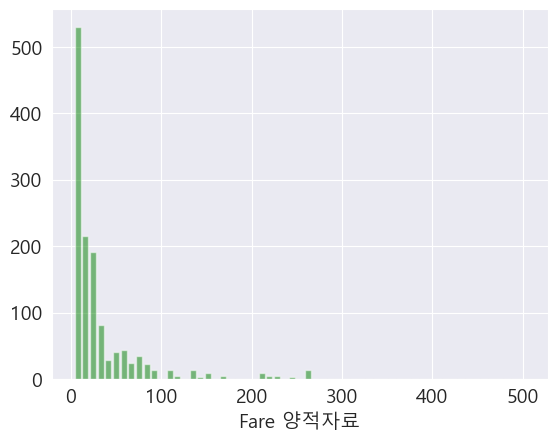

In [195]:
width = (max(all_data_bin['Fare']) - min(all_data_bin['Fare'])) / K #계급 간격 구하는 공식
bins = np.arange(min(all_data_bin['Fare']), max(all_data_bin['Fare']), width)


hist, bins = np.histogram(all_data_bin['Fare'], bins)
print(hist)
print(bins)

plt.hist(all_data_bin['Fare'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('Fare 양적자료' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [196]:
all_data_bin['log_Fare'] = np.log(all_data_bin['Fare'])
min_log_fare = min(all_data_bin['log_Fare'])
min_log_fare_row = all_data_bin[all_data_bin['log_Fare'] == min_log_fare]
print(min_log_fare_row)
# 제일 log_Fare 값이 작은 열 출력




             Pclass  Age  SibSp  Parch    Fare  Cabin  log_Fare
PassengerId                                                    
913               3  9.0      0      1  3.1708      8  1.153984


C:\Users\park sung hyuk95\AppData\Local\Temp\ipykernel_26812\1862207990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_bin['log_Fare'] = np.log(all_data_bin['Fare'])


width : 0.08474972441987998
6.238967387173662
1.1539839219808636
hist : [  1   0   1   0   0   1   0   1   9  89 307  36  26   9  44  12  73  51
  45  20  13  14  32  31  71  52  34  28  18  21   7  11  13  34  25  11
  17  32  20  16   0  10   7   0  13  12   4   0   0   9   9   3  13   0
   0   0   0   0   0]
bins : [1.154 1.239 1.323 1.408 1.493 1.578 1.662 1.747 1.832 1.917 2.001 2.086
 2.171 2.256 2.34  2.425 2.51  2.595 2.679 2.764 2.849 2.934 3.018 3.103
 3.188 3.273 3.357 3.442 3.527 3.612 3.696 3.781 3.866 3.951 4.035 4.12
 4.205 4.29  4.374 4.459 4.544 4.629 4.713 4.798 4.883 4.968 5.052 5.137
 5.222 5.307 5.391 5.476 5.561 5.646 5.73  5.815 5.9   5.985 6.069 6.154]


(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

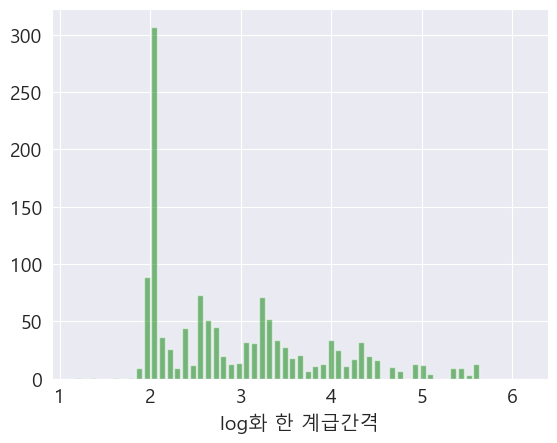

In [197]:
width = (max(all_data_bin['log_Fare']) - min(all_data_bin['log_Fare'])) / K #계급 간격 구하는 공식
print(f'width : {width}')
print(max(all_data_bin['log_Fare']))
print(min(all_data_bin['log_Fare']))
bins = np.arange(min(all_data_bin['log_Fare']), max(all_data_bin['log_Fare']), width)
hist, bins = np.histogram(all_data_bin['log_Fare'], bins)
print(f'hist : {hist}')
print(f'bins : {bins}')

plt.hist(all_data_bin['log_Fare'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('log화 한 계급간격' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [198]:
# 범주의 크기를 지정할 width 변수 설정

bins = np.arange(min(all_data_bin['log_Fare']), max(all_data_bin['log_Fare']), width)
print(bins)
hist, bins = np.histogram(all_data_bin['log_Fare'], bins)
width = len(bins)

# 범주의 최솟값(min)과 최댓값(max)을 계산
min_val = all_data_bin['log_Fare'].min()
max_val = all_data_bin['log_Fare'].max()

# 최솟값과 최댓값을 width 간격으로 나눠서 labels 배열 생성
labels = [f'{round(i,1)}' for i in bins]

# train['Fare'] 값을 labels에 맞게 범주형으로 변환
all_data_bin['Fare_binned'] = pd.cut(all_data_bin['log_Fare'], bins=len(labels), labels=labels , ordered = False)
# train 데이터프레임 내용 확인
all_data_bin


[1.154 1.239 1.323 1.408 1.493 1.578 1.662 1.747 1.832 1.917 2.001 2.086
 2.171 2.256 2.34  2.425 2.51  2.595 2.679 2.764 2.849 2.934 3.018 3.103
 3.188 3.273 3.357 3.442 3.527 3.612 3.696 3.781 3.866 3.951 4.035 4.12
 4.205 4.29  4.374 4.459 4.544 4.629 4.713 4.798 4.883 4.968 5.052 5.137
 5.222 5.307 5.391 5.476 5.561 5.646 5.73  5.815 5.9   5.985 6.069 6.154]


C:\Users\park sung hyuk95\AppData\Local\Temp\ipykernel_26812\923821678.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_bin['Fare_binned'] = pd.cut(all_data_bin['log_Fare'], bins=len(labels), labels=labels , ordered = False)


,Pclass,Age,SibSp,Parch,Fare,Cabin,log_Fare,Fare_binned
PassengerId,,,,,,,,
1,3,22.000000,1,0,7.2500,8,1.981001,1.9
2,1,38.000000,1,0,71.2833,2,4.266662,4.2
3,3,26.000000,0,0,7.9250,8,2.070022,2.0
4,1,35.000000,1,0,53.1000,2,3.972177,4.0
5,3,35.000000,0,0,8.0500,8,2.085672,2.0
...,...,...,...,...,...,...,...,...
1305,3,28.516607,0,0,8.0500,8,2.085672,2.0
1306,1,39.000000,0,0,108.9000,2,4.690430,4.6
1307,3,38.500000,0,0,7.2500,8,1.981001,1.9


In [199]:
labels = [f"{bins[i]:.1f}~{bins[i+1]:.1f}" for i in range(len(bins)-1)]

# train['Fare'] 값을 labels에 맞게 범주형으로 변환
all_data_bin['Fare_binned_범위'] = pd.cut(all_data_bin['log_Fare'], bins=len(labels), labels=labels , ordered=False)
# train 데이터프레임 내용 확인
all_data_bin

,Pclass,Age,SibSp,Parch,Fare,Cabin,log_Fare,Fare_binned,Fare_binned_범위
PassengerId,,,,,,,,,
1,3,22.000000,1,0,7.2500,8,1.981001,1.9,1.9~2.0
2,1,38.000000,1,0,71.2833,2,4.266662,4.2,4.2~4.3
3,3,26.000000,0,0,7.9250,8,2.070022,2.0,2.0~2.1
4,1,35.000000,1,0,53.1000,2,3.972177,4.0,3.9~4.0
5,3,35.000000,0,0,8.0500,8,2.085672,2.0,2.0~2.1
...,...,...,...,...,...,...,...,...,...
1305,3,28.516607,0,0,8.0500,8,2.085672,2.0,2.0~2.1
1306,1,39.000000,0,0,108.9000,2,4.690430,4.6,4.6~4.7
1307,3,38.500000,0,0,7.2500,8,1.981001,1.9,1.9~2.0


In [200]:
print(all_data_bin['Fare_binned'].unique())

print(all_data_bin['Fare_binned_범위'].unique())

['1.9', '4.2', '2.0', '4.0', '2.1', ..., '5.3', '1.3', '5.4', '1.6', '1.2']
Length: 42
Categories (51, object): ['1.2', '1.3', '1.4', '1.5', ..., '5.9', '6.0', '6.1', '6.2']
['1.9~2.0', '4.2~4.3', '2.0~2.1', '3.9~4.0', '2.1~2.2', ..., '4.5~4.5', '4.5~4.6', '3.7~3.8', '1.6~1.7', '1.2~1.2']
Length: 47
Categories (59, object): ['1.2~1.2', '1.2~1.3', '1.3~1.4', '1.4~1.5', ..., '5.8~5.9', '5.9~6.0', '6.0~6.1', '6.1~6.2']


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

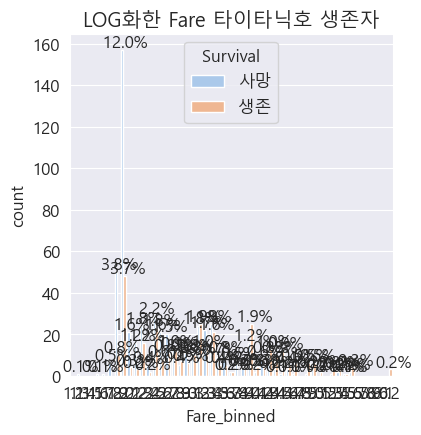

In [201]:
from matplotlib import gridspec

mpl.rc('font' , size = 12)
grid = gridspec.GridSpec(3,2) # 그래프(서브플롯)을 3행 2열로 배치
plt.figure(figsize=(10,16)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace= 0.4 , hspace= 0.3) # 서브플롯 간 좌우/상하 여백 설정
all_data_bin['Survival'] = train['Survived'].map({0: '사망', 1: '생존'})
# 서브플롯 그리기# 피처 목록

for idx, feature in enumerate(['Fare_binned']) :

    ax = plt.subplot(grid[idx])

    # ax 축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature , data = all_data_bin , hue = 'Survival' , palette = 'pastel' , ax= ax)
    # hue는 세부적으로 나눠 그릴 기준 피처, 여기서는 타깃값(target)을 전달했다.
    ax.set_title(f'LOG화한 Fare 타이타닉호 생존자') # 그래프 제목 설정
    write_percent(ax, len(all_data_bin))



In [202]:
bins_exp = np.exp(bins)
bins_exp

array([  3.171,   3.451,   3.756,   4.089,   4.45 ,   4.844,   5.272,
         5.739,   6.246,   6.799,   7.4  ,   8.054,   8.767,   9.542,
        10.386,  11.305,  12.305,  13.393,  14.577,  15.867,  17.27 ,
        18.798,  20.46 ,  22.27 ,  24.239,  26.383,  28.717,  31.256,
        34.021,  37.03 ,  40.305,  43.87 ,  47.75 ,  51.973,  56.57 ,
        61.573,  67.019,  72.946,  79.398,  86.42 ,  94.064, 102.383,
       111.438, 121.295, 132.022, 143.699, 156.409, 170.242, 185.299,
       201.688, 219.526, 238.942, 260.075, 283.077, 308.114, 335.365,
       365.026, 397.311, 432.451, 470.698])

### 'AGE' 계급간격 구하기

In [203]:
all_data_bin['Age'].describe()

count    1309.000000
mean       29.315700
std        13.440066
min         0.000000
25%        21.000000
50%        28.000000
75%        36.824818
max        80.000000
Name: Age, dtype: float64

[1276]
[ 0. 60.]


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

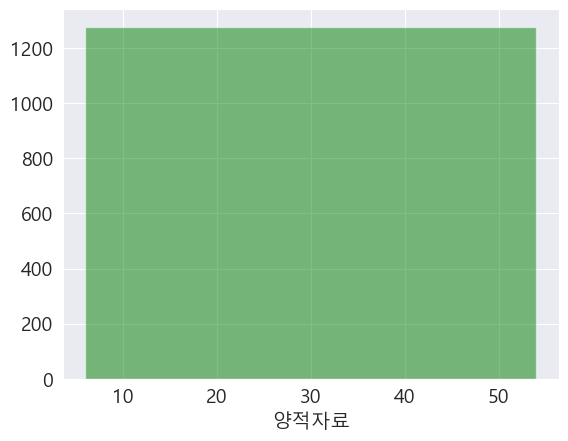

In [204]:
bins = np.arange(min(all_data_bin['Age']), max(all_data_bin['Age']), width)


hist, bins = np.histogram(all_data_bin['Age'], bins)
print(hist)
print(bins)

plt.hist(all_data_bin['Age'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('양적자료' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)



### 분포가 생각보다 일정해서 log 화 안해도 될거 같다.
---

### 대신 간격의 수를 줄여야 겠다. 10대 20대 30대 이런식으로 하는것이 좋을 거 같다.

- describe()에서 최대값이 80살 , 최소값이 0살이므로 10개의 계급간격을 나누면 좋을거 같다.

width : 8.0
80.0
0.0
hist : [ 88 196 493 265 157  70  32   8]
bins : [ 0 10 20 30 40 50 60 70 80]


,Pclass,Age,SibSp,Parch,Fare,Cabin,log_Fare,Fare_binned,Fare_binned_범위,Survival,Age_binned
PassengerId,,,,,,,,,,,
1,3,22.000000,1,0,7.2500,8,1.981001,1.9,1.9~2.0,사망,20대
2,1,38.000000,1,0,71.2833,2,4.266662,4.2,4.2~4.3,생존,30대
3,3,26.000000,0,0,7.9250,8,2.070022,2.0,2.0~2.1,생존,20대
4,1,35.000000,1,0,53.1000,2,3.972177,4.0,3.9~4.0,생존,30대
5,3,35.000000,0,0,8.0500,8,2.085672,2.0,2.0~2.1,사망,30대
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,28.516607,0,0,8.0500,8,2.085672,2.0,2.0~2.1,NaN,20대
1306,1,39.000000,0,0,108.9000,2,4.690430,4.6,4.6~4.7,NaN,30대
1307,3,38.500000,0,0,7.2500,8,1.981001,1.9,1.9~2.0,NaN,30대


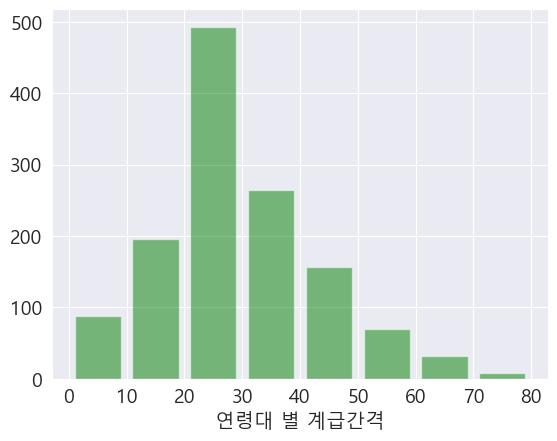

In [205]:
width = (max(all_data_bin['Age']) - min(all_data_bin['Age'])) / 10 #계급 간격 구하는 공식

# width = np.arange(0,90,10)

print(f'width : {width}')
print(max(all_data_bin['Age']))
print(min(all_data_bin['Age']))
bins = np.arange(0,90,AGG)
hist, bins = np.histogram(all_data_bin['Age'], bins)
print(f'hist : {hist}')
print(f'bins : {bins}')

plt.hist(all_data_bin['Age'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('연령대 별 계급간격' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
labels = [f"{bins[i]}대" for i in range(len(bins)-1)]

all_data_bin['Age_binned'] = pd.cut(all_data_bin['Age'], bins=len(labels), labels=labels , ordered = False)
all_data_bin

In [206]:
all_data_bin.columns.tolist()

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'log_Fare',
 'Fare_binned',
 'Fare_binned_범위',
 'Survival',
 'Age_binned']

In [207]:
all_data_bin2 = all_data_bin[['Age','Age_binned','Pclass' ,'SibSp','Parch' ,'Survival' , 'Cabin','Fare' ,'Fare_binned' ]]
all_data_bin2

,Age,Age_binned,Pclass,SibSp,Parch,Survival,Cabin,Fare,Fare_binned
PassengerId,,,,,,,,,
1,22.000000,20대,3,1,0,사망,8,7.2500,1.9
2,38.000000,30대,1,1,0,생존,2,71.2833,4.2
3,26.000000,20대,3,0,0,생존,8,7.9250,2.0
4,35.000000,30대,1,1,0,생존,2,53.1000,4.0
5,35.000000,30대,3,0,0,사망,8,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
1305,28.516607,20대,3,0,0,NaN,8,8.0500,2.0
1306,39.000000,30대,1,0,0,NaN,2,108.9000,4.6
1307,38.500000,30대,3,0,0,NaN,8,7.2500,1.9


## train_bin 에는 log 화밑 계급화 시킨 값들 모두 포함 시켰다.

## train_bin2 로 train 데이터로 활용하면 좋을 수 도 있겠다.


---

## 명목형 피처 전처리를 해보자

In [208]:
all_data_obj

,Name,Sex,Embarked
PassengerId,,,
1,3,1,2
2,4,0,0
3,2,0,2
4,4,0,2
5,3,1,2
...,...,...,...
1305,3,1,2
1306,6,0,0
1307,3,1,2


## ==> MR. MRS. MISS . baby 등 필요할듯

In [209]:
all_data_obj2 =  pd.merge(all_data_obj, all_data_bin2['Survival'] , how='outer' , on=('PassengerId'))
all_data_obj2

,Name,Sex,Embarked,Survival
PassengerId,,,,
1,3,1,2,사망
2,4,0,0,생존
3,2,0,2,생존
4,4,0,2,생존
5,3,1,2,사망
...,...,...,...,...
1305,3,1,2,NaN
1306,6,0,0,NaN
1307,3,1,2,NaN


In [210]:
all_data2 = pd.merge(all_data_obj , all_data_bin2, how='outer' , on=('PassengerId'))

all_data2 = all_data2[['Survival','Name','Sex' , 'Embarked' ,'Age_binned', 'Pclass' ,'SibSp' , 'Parch' , 'Cabin' , 'Fare_binned']]
columns_1 = all_data2.columns.tolist()
all_data2

,Survival,Name,Sex,Embarked,Age_binned,Pclass,SibSp,Parch,Cabin,Fare_binned
PassengerId,,,,,,,,,,
1,사망,3,1,2,20대,3,1,0,8,1.9
2,생존,4,0,0,30대,1,1,0,2,4.2
3,생존,2,0,2,20대,3,0,0,8,2.0
4,생존,4,0,2,30대,1,1,0,2,4.0
5,사망,3,1,2,30대,3,0,0,8,2.0
...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,1,2,20대,3,0,0,8,2.0
1306,NaN,6,0,0,30대,1,0,0,2,4.6
1307,NaN,3,1,2,30대,3,0,0,8,1.9


In [211]:
print(all_data2['Sex'].unique())

[1 0]


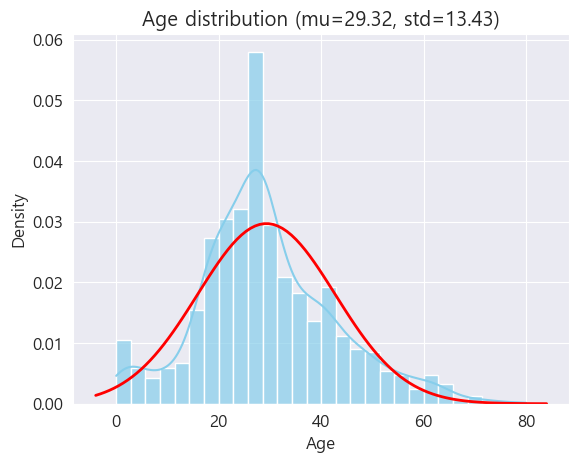

In [212]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

# 히스토그램과 정규분포 곡선 그리기
sns.histplot(all_data['Age'], kde=True, stat='density', color='skyblue', alpha=0.7)
mu, std = norm.fit(all_data['Age'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title(f'Age distribution (mu={mu:.2f}, std={std:.2f})')
plt.show()

## 모델링_with 피처엔지니어링

- 명목형 피처는 OneHotEncoding ==> Name , Sex , Embarked

- Pclass 는 MinMaxScaler로

In [213]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder() # 원-핫 인코더 생성
nom_feature = ['Name','Age_binned','Sex' , 'Embarked', 'Cabin' , 'Fare_binned']
encoded_nom_matrix = onehot_encoder.fit_transform(all_data2[nom_feature])
print(type(encoded_nom_matrix))
encoded_nom_matrix

<class 'scipy.sparse._csr.csr_matrix'>


<1309x71 sparse matrix of type '<class 'numpy.float64'>'
	with 7854 stored elements in Compressed Sparse Row format>

In [214]:
# 범주형 변수의 원래 이름을 추출합니다.
#
nom_feature_names = []
for feature in nom_feature:
    categories = onehot_encoder.categories_[nom_feature.index(feature)]
    for category in categories:
        nom_feature_names.append(f"{feature}_{category}")



# 결과를 출력합니다.
print(nom_feature_names)


['Name_0', 'Name_1', 'Name_2', 'Name_3', 'Name_4', 'Name_5', 'Name_6', 'Age_binned_0대', 'Age_binned_10대', 'Age_binned_20대', 'Age_binned_30대', 'Age_binned_40대', 'Age_binned_50대', 'Age_binned_60대', 'Age_binned_70대', 'Sex_0', 'Sex_1', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Cabin_0', 'Cabin_1', 'Cabin_2', 'Cabin_3', 'Cabin_4', 'Cabin_5', 'Cabin_6', 'Cabin_7', 'Cabin_8', 'Fare_binned_1.2', 'Fare_binned_1.3', 'Fare_binned_1.6', 'Fare_binned_1.7', 'Fare_binned_1.8', 'Fare_binned_1.9', 'Fare_binned_2.0', 'Fare_binned_2.1', 'Fare_binned_2.2', 'Fare_binned_2.3', 'Fare_binned_2.4', 'Fare_binned_2.5', 'Fare_binned_2.6', 'Fare_binned_2.7', 'Fare_binned_2.8', 'Fare_binned_2.9', 'Fare_binned_3.0', 'Fare_binned_3.1', 'Fare_binned_3.2', 'Fare_binned_3.3', 'Fare_binned_3.4', 'Fare_binned_3.5', 'Fare_binned_3.6', 'Fare_binned_3.7', 'Fare_binned_3.8', 'Fare_binned_3.9', 'Fare_binned_4.0', 'Fare_binned_4.1', 'Fare_binned_4.2', 'Fare_binned_4.3', 'Fare_binned_4.4', 'Fare_binned_4.5', 'Fare_binned_4.6', 

In [215]:
print(type(encoded_nom_matrix))

<class 'scipy.sparse._csr.csr_matrix'>


In [216]:
all_data2

,Survival,Name,Sex,Embarked,Age_binned,Pclass,SibSp,Parch,Cabin,Fare_binned
PassengerId,,,,,,,,,,
1,사망,3,1,2,20대,3,1,0,8,1.9
2,생존,4,0,0,30대,1,1,0,2,4.2
3,생존,2,0,2,20대,3,0,0,8,2.0
4,생존,4,0,2,30대,1,1,0,2,4.0
5,사망,3,1,2,30대,3,0,0,8,2.0
...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,1,2,20대,3,0,0,8,2.0
1306,NaN,6,0,0,30대,1,0,0,2,4.6
1307,NaN,3,1,2,30대,3,0,0,8,1.9


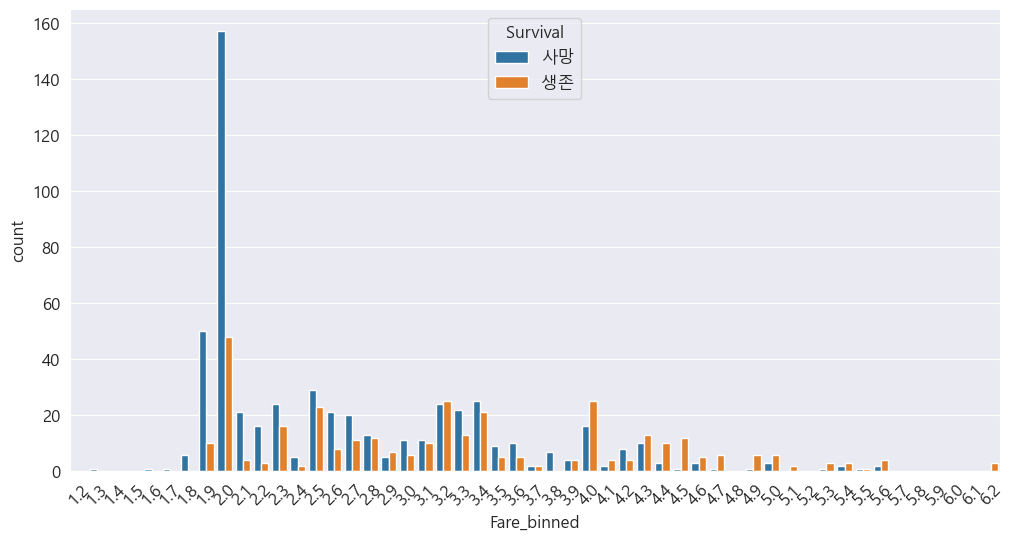

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 그래프 그리기
ax = sns.countplot(x='Fare_binned', hue='Survival', data=all_data2)

# x 축 값이 잘 보이도록 설정
ax.tick_params(axis='x', labelrotation=45)

# 그래프 출력
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

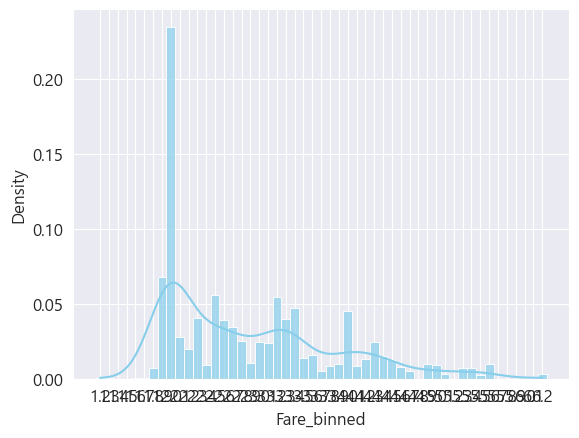

In [218]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# 히스토그램 그리기
sns.histplot(all_data2['Fare_binned'].dropna(), kde=True, stat='density', color='skyblue', alpha=0.7)

# 정규분포 계산
mu, std = norm.fit(all_data2['Fare_binned'].dropna())

# x 값 범위 설정
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규분포 그래프 그리기
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

# 그래프 제목 설정
plt.title(f'Fare 범위(log화) (mu={mu:.2f}, std={std:.2f})')

# 그래프 출력
plt.show()


In [ ]:
# all_data2 = all_data2.drop(nom_feature , axis =1)
all_data2

In [ ]:
# all_data2['log_Fare'] = np.log(all_data['Fare'])
# all_data2

# 인코딩 및 스케일링 된 피처 합치기

In [ ]:
# from sklearn.preprocessing import StandardScaler
#
# standard_scaler = StandardScaler()
#
# encoded_stan = standard_scaler.fit_transform(all_data2[['Name','Age' ]])
#
# encoded_stan

In [ ]:
# import seaborn as sns
# from scipy.stats import norm
# import matplotlib.pyplot as plt
#
# # 히스토그램과 정규분포 곡선 그리기
# sns.histplot(all_data2['Fare_binned'], kde=True, stat='density', color='skyblue', alpha=0.7)
# mu, std = norm.fit(all_data2['Fare_binned'].dropna())
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 10)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'r', linewidth=2)
# plt.title(f'Fare_binned (mu={mu:.2f}, std={std:.2f})')
# plt.show()

In [ ]:
nom_feature_names

In [ ]:
all_data2 = all_data2[['SibSp' ,'Pclass', 'Parch']]
all_data2

In [ ]:
encoded_nom_matrix

In [ ]:
# encoded_stan

In [ ]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data2),
                               encoded_nom_matrix],
                              format='csr')

all_data_sprs

In [ ]:
CSR_NAMES = all_data2.columns.tolist() + nom_feature_names
CSR_NAMES

In [ ]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train = all_data_sprs[:num_train] # 0~num_train -1 행
X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['Survived'].values

In [ ]:
print(X_train.toarray())

In [ ]:
X_train

## 하이퍼파라미터 최적화

In [ ]:
import numpy as np


def eval_gini(y_true, y_pred):
    # 실제값과 예측값의 크기가 서로 같은지 확인(값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0]  # 데이터 개수
    L_mid = np.linspace(1 / n_samples, 1, n_samples)  # 대각선 값

    # 1) 예측값에 대한 지니계수

    pred_order = y_true[y_pred.argsort()]  # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order)  # 로렌츠 곡선

    G_pred = np.sum(L_mid - L_pred)  # 예측값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수

    true_order = y_true[y_true.argsort()]  # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order)  # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true)  # 예측이 완벽할 때 지니계수

    # 정규화된 지니계수
    return G_pred / G_true


# LightGBM 용 gini() 함수

def gini(preds, dtrain):
    labels = dtrain.get_label()

    return 'gini', eval_gini(labels, preds), True


In [ ]:
# OOF 방식으로 LightGBM 훈련
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

# 층화 K 폴드 교차 검증기는 타깃값이 불균형하므로 K폴드가 아닌 층화 K폴드를 수행하는 게 바람직하다. 층화 K폴드는 타깃값이 균등하게
# 폴드를 나누는 방식이기 때문이다.


# n_splits 파라미터로 전달한 수만큼 폴드를 나눈다. 여기서는 5개로 나누었다. shuffle = True 를 전달하면 폴드를 나눌때 데이터를 섞어준다.
# LightGBM의 하이퍼파라미터를 설정한다. LightGBM은 하이퍼파라미터를 갖고 있지만, 여기서는 4가지만 설정한다.

params = {'objective': 'binary', 'learning_rate': 0.01, 'force_row_wise': True, 'random_state': 0}

# 이진분류 문제이므로 objective 파라미터는 binary로 설정했다. 학습률은 0.01로, 랜덤 스테이트 값은 9으로 설정했다.
# force_row_wise : True 는 경고 문구를 없애려고 추가한 파라미터이다.
# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X_train.shape[0])

# ==> oof_val_preds 는 검증 데이터를 활용해 예측한 확률값을 저장하는 배열이다. K 폴드로 나누어도 훈련 데이터 전체가 결국엔 한 번씩 검증 데이터로 활용된다. 따라서 oof_val_preds 배열 크기는 훈련 데이터와 같아야 한다.
# 훈련 데이터 개수는 X.shpae[0]으로 구한다.

# OOF 방식으로 훈련된 모델로 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0])

# oof_test_preds는 테스트 데이터를 활용해 예측한 확률값을 저장하는 배열이다. 최종 제출에 사용할 값이므로 크기는 테스트 데이터와 같아야한다. 테스트 데이터 개수는 X_test.shape[0]으로 구한다.


In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X_train, y)):
    print('#' * 40, f'폴드 {idx + 1} / 폴드 {folds.n_splits}', '#' * 40)

    X_train2, y_train = X_train[train_idx], y[train_idx]  # 훈련용 데이터
    X_valid, y_valid = X_train[valid_idx], y[valid_idx]  # 검증용 데이터

    dtrain = lgb.Dataset(X_train2, y_train)  # LightGBM 전용 훈련 데이터 셋
    dvalid = lgb.Dataset(X_valid, y_valid)  # LightGBM 전용 검증 데이터 셋

    lgb_model = lgb.train(params=params,  # 훈련용 하이퍼파라미터
                          train_set=dtrain,  # 훈련 데이터 셋
                          num_boost_round=1000,  # 부스팅 반복 횟수
                          valid_sets=dvalid,  # 성능 평가용 검증 데이터 셋
                          early_stopping_rounds=100,  # 조기종료 조건
                          verbose_eval=100)  # 100번째마다 점수 출력

    oof_test_preds += lgb_model.predict(X_test) / folds.n_splits

    # 이진 분류에 맞게 변환
    oof_val_preds[valid_idx] += (lgb_model.predict(X_valid) >= 0.5).astype(int)

    # 적절한 평가지표 선택
    accuracy = accuracy_score(y_valid, oof_val_preds[valid_idx])
    precision = precision_score(y_valid, oof_val_preds[valid_idx])
    recall = recall_score(y_valid, oof_val_preds[valid_idx])
    f1 = f1_score(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx + 1} 정확도: {accuracy}, 정밀도: {precision}, 재현율: {recall}, F1 점수: {f1}\n')


In [ ]:
print('OOF 검증 데이터 지니계수 :' , eval_gini(y,  oof_val_preds))

In [ ]:
from sklearn.metrics import roc_curve, auc

# 검증 데이터에 대한 예측 확률을 얻습니다.
valid_probabilities = lgb_model.predict(X_valid)

# Case 1: valid_probabilities가 1차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
positive_probabilities = valid_probabilities

# Case 2: valid_probabilities가 2차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
# positive_probabilities = valid_probabilities[:, 1]

# ROC 곡선을 생성합니다.
fpr, tpr, thresholds = roc_curve(y_valid, positive_probabilities)

# ROC 곡선 아래 면적(Area Under Curve, AUC)을 계산합니다.
roc_auc = auc(fpr, tpr)

# ROC 곡선을 시각화합니다.
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 직선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 최적의 임계값 선택
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("최적의 임계값:", optimal_threshold)


In [ ]:
threshold = optimal_threshold  # 임계값 설정

# 이진 분류로 변환
binary_preds = (oof_test_preds >= threshold).astype(int)

# 이진 분류 결과 출력
print("이진 분류 예측 결과:", binary_preds)
y_preds = binary_preds
y_preds
# y_preds = oof_test_preds

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute , now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ",date_list)



In [ ]:
# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## LightGBM 모델 하이퍼파라미터 최적화

In [ ]:
all_data_sprs

In [ ]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y= train['Survived'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)


# 베이지안 최적화용 데이터셋
bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

In [ ]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위

# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'num_leaves' : (30 , 40) , # 개별 트리가 가질 수 있는 최대 말단 노드 개수 , 트리 복잡도 결정, 값이 클수록 좋다.
                'lambda_l1' : (0.7 , 0.9), # L1 규제 조정값 , 값이 클수록 과대적합 방지 효과
                'lambda_l2' : (0.9 , 1), # L2 규제 조정값 , 값이 클수록 과대적합 방지 효과
                'feature_fraction' : (0.6 , 0.7), # 개별 트리를 훈련할 때 사용할 피처 샘플링 비율
                'bagging_fraction' : (0.6 , 0.9), # 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
                'min_child_samples' : (6 , 10) , # 말단 노드가 되기 위해 필요한 최소 데이터 개수 , 값이 클수록 과대적합 방지
                'min_child_weight' : (10 , 40)} # 과대적합 방지 위한 값


# 값이 고정된 하이퍼파라미터

fixed_params = {'objective' : 'binary' , # 훈련 목적 , 회귀에서는 'regression' , 이진분류에서는 'binary' , 다중분류에서는 'multiclass' 사용
                'learning_rate' : 0.005, # 학습률( 부스팅 이터레이션을 반복하면서 모델을 업데이트하는 데 사용 되는 비율)
                'bagging_freq' : 1, # 배깅 수행 빈도, 몇번의 이터레이션마다 배깅 수행할 지 결정
                'force_row_wise' : True, # 메모리 용량이 충분하지 않을 때 메모리 효율을 높이는 파라미터
                'random_state' : 1991} # 랜덤 시드값 (코드를 반복 실행해도 같은 결과가 나오게 지정하는 값)

In [ ]:
def eval_function(num_leaves , lambda_l1 , lambda_l2 , feature_fraction , bagging_fraction , min_child_samples , min_child_weight) :

    # 최적화하려는 평가지표(지니계수) 계산 함수

    # 베이지안 최적화를 수행할 하이퍼파라미터

    params = {'num_leaves' : int(round(num_leaves)) , # 개발 트리가 가질 수 있는 최대 말단 노드 개수, 트리 복잡도 결정 , 값이 클수록 좋다.
              'lambda_l1' : lambda_l1, # L1 규제 조정값 , 값이 클 수록 과대적합 방지 효과
              'lambda_l2' : lambda_l2 , # L2 규제 조정값 , 값이 클 수록 과대적합 방지 효과
              'feature_fraction' : feature_fraction ,  # 개별 트리를 훈련할 때 사용할 피처 샘플링 비율
              'bagging_fraction' : bagging_fraction, # 개별 트리를 훈련할 때 사용할 배깅 데이터 샘플링 비율
              'min_child_samples' : int(round(min_child_samples)) , # 말단 노드가 되기 위해 필요한 최소 데이터 개수, 값이 클수록 과대적합 방지
              'min_child_weight' : min_child_weight, # 과대적합 방지 위한 값
              'feature_pre_filter' : False} #

    #하이퍼파라미터도 추가
    params.update(fixed_params)

    print('하이퍼파라미터 : ' , params)

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params = params , # 훈련용 하이퍼파라미터
                          train_set = bayes_dtrain, # 훈련 데이터셋
                          num_boost_round= 2500, #부스팅 반복횟수
                          valid_sets= bayes_dvalid, # 성능 평가용 검증 데이터 셋
                          feval = gini, # 검증용 평가지표
                          early_stopping_rounds= 300, # 조기종료 조건
                          verbose_eval= False) # 계속 점수 출력
    # 검증 데이터로 예측 수행
    preds = lgb_model.predict(X_valid)

    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')

    return gini_score

In [ ]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f = eval_function, # 평가지표 계산 함수
                                 pbounds = param_bounds, # 하이퍼파라미터 범위
                                 random_state = 0 )

In [ ]:
# 베이지안 최적화 수행

optimizer.maximize(init_points=  3 , n_iter = 6) # init_points 는 무작위로 하이퍼파라미터를 탐색하는 횟수, n_iter는 베이지안 최적화 반복 횟수

In [ ]:
# 평가함수 점수가 최대일 대 하이퍼파라미터
max_params = optimizer.max['params']
max_params


In [ ]:
# 정수형 하이퍼파라미터 변환

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))
# 값이 고정된 하이퍼파라미터 추가

max_params.update(fixed_params)
# 최종 하이퍼파라미터 출력
max_params

In [ ]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 생성
folds = StratifiedKFold(n_splits=5 , shuffle = True , random_state= 1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열

oof_val_preds = np.zeros(X.shape[0])

# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0])

# OOF 방식으로 모델 훈련 ,검증 , 예측

for idx, (train , valid_idx) in enumerate(folds.split(X,y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40 , f'폴드 {idx+1} / 폴드 {folds.n_splits}' , '#'*40)

    X_train , y_train = X[train_idx] , y[train_idx] # 훈련용 데이터
    X_valid , y_valid = X[valid_idx] , y[valid_idx] # 검증용 데이터

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train , y_train) # LightGBM 전용 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid , y_valid) # LightGBM 전용 검증 데이터셋

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params = max_params , # 최적 하이퍼파라미터
                          train_set = dtrain, # 훈련 데이터 셋
                          num_boost_round= 2500, # 부스팅 반복 횟수
                          valid_sets= dvalid , # 성능 평가용 검증 데이터셋
                          feval = gini, # 검증용 평가지표
                          early_stopping_rounds= 300, # 조기종료 조건
                          verbose_eval = 100) # 100 번째 마다 점수 출력

    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += lgb_model.predict(X_test) / folds.n_splits

    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측

    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    oof_test_preds_lgb = oof_test_preds
    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1}  지니계수 : {gini_score}\n')

In [ ]:
print('OOF 검증 데이터 지니계수 :' , eval_gini(y,  oof_val_preds))

In [ ]:
from sklearn.metrics import roc_curve, auc

# 검증 데이터에 대한 예측 확률을 얻습니다.
valid_probabilities = lgb_model.predict(X_valid)

# Case 1: valid_probabilities가 1차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
positive_probabilities = valid_probabilities

# Case 2: valid_probabilities가 2차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
# positive_probabilities = valid_probabilities[:, 1]

# ROC 곡선을 생성합니다.
fpr, tpr, thresholds = roc_curve(y_valid, positive_probabilities)

# ROC 곡선 아래 면적(Area Under Curve, AUC)을 계산합니다.
roc_auc = auc(fpr, tpr)

# ROC 곡선을 시각화합니다.
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 직선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 최적의 임계값 선택
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("최적의 임계값:", optimal_threshold)


In [ ]:
threshold = optimal_threshold  # 임계값 설정

# 이진 분류로 변환
binary_preds = (oof_test_preds_lgb >= threshold).astype(int)

# 이진 분류 결과 출력
print("이진 분류 예측 결과:", binary_preds)
y_preds = binary_preds
y_preds
# y_preds = oof_test_preds

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute , now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## XGBoost 모델

In [ ]:
# XGBoost용 gini() 함수

def gini(preds , dtrain):
    labels = dtrain.get_label()
    return 'gini' , eval_gini(labels,preds)

### 데이터 셋 준비


In [ ]:
import xgboost as xgb

from sklearn.model_selection import train_test_split

# 8:2 비율로 훈련 데이터 , 검증 데이터 분리( 베이지안 최적화 수행용)

X_train , X_valid , y_train , y_valid = train_test_split(X,y, test_size=0.2 , random_state=0)

# 베이지안 최적화용 데이터셋

bayes_dtrain = xgb.DMatrix(X_train , y_train)
bayes_dvalid = xgb.DMatrix(X_valid, y_valid)

### 하이퍼파라미터 범위 설정

In [ ]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'max_depth' : (4 , 8) , # 개별 트리의 최대 깊이, 트리 깊이가 깊을수록 모델이 복잡해지고 과대적합 우려
                # 값이 클수록 깊이가 한 단계만 늘어나도 메모리 사용량이 급격히 많아진다.
                # 일반적으로 3~10 사이의 값을 주로 사용한다.

                'subsample' : (0.6 , 0.9), # 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
                # 0~1 사이 값으로 설정할 수 있다.
                # 0.5 로 설정하면 전체 데이터의 50%를 사용해 트리를 생성

                'colsample_bytree' : (0.7 , 1.0), # 개별 트리를 훈련할 때 사용하는 피처 샘플링 비율
                # subsample 과 유사한 개념, subsample은 전체 데이터에서 얼마나 샘플링할지 나타내는 비율
                # colsample_bytree는 전체 피처에서 얼마나 샘플링할지 나타내는 비율
                # 값이 작을수록 과대적합 방지 효과

                'min_child_weight' : (5 , 7), # 과대적합 방지위한 값, 값이 클수록 과대적합 방지 효과가 있다.
                'gamma' : (8 , 11), # 말단 노드가 분할하기 위한 최소 손실 감소 값
                # 소실 감소가 gamma보다 크면 말단 노드를 분할
                # 값이 클수록 과대적합 방지 효과가 있다.

                'reg_alpha' : (7 , 9) , # L1 규제 조정 값 , 값이 클수록 과대적합 방지 효과
                'reg_lambda' : (1.1 , 1.5), # L2 규제 조정값 , 값이 클수록 과대적합 방지 효과
                'scale_pos_weight' : (1.4 , 1.6)} # 뷸균형 데이터 가중치 조정 값 ,
# 타깃값이 불균형할 때 양성 값에 scale_pos_weight 만큼 가중치를 줘서 균형을 맞춤(타깃값 1을 양성 값으로 간주)
# 일반적으로 scale_pos_weight 값을 (음성 타깃값 개수 / 양성 타깃값 개수) 로 설정


# 값이 고정된 하이퍼파라미터

fixed_params = {'objective' : 'binary:logistic' ,# 훈련 목적 , binary : logistic( 확률값을 구하는 이진분류)
                # reg : squarederror (회귀 문제)
                # 소프트맥스 함수를 사용하는 다중분류에서는 multi : softmax 사용
                # 확률값을 구하는 다중분류에서는 'multi : softprob' 사용
                'learning_rate' : 0.02, # 학습률( 부스팅 스텝을 반복하면서 모델을 업데이트하는 데 사용되는 비율)
                'random_state' : 1991} # 랜덤 시드값(코드를 반복 실행해도 같은 결과가 나오게 지정하는 값)

In [ ]:
def eval_function(max_depth , subsample , colsample_bytree , min_child_weight , reg_alpha , gamma , reg_lambda , scale_pos_weight) :

    # 최적화하려는 평가지표(지니계수) 계산 함수

    # 베이지안 최적화를 수행할 하이퍼파라미터

    params = {'max_depth' : int(round(max_depth)) , # 개별 트리의 최대깊이
              'subsample' : subsample, # 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
              'colsample_bytree' : colsample_bytree , # 개별 트리를 훈련할때 사용하는 피처 샘플링
              'min_child_weight' :  # 과대적합 방지위한 값
                  min_child_weight,
              'gamma' : gamma, # 말단 노드가 분할하기 위한 최소 손실 감소 값
              'reg_alpha' : reg_alpha, # L1 규제 조정값
              'reg_lambda' : reg_lambda, # L2 규제 조정값
              'scale_pos_weight' : scale_pos_weight} # 불균형 데이터 가중치 조정값

    # 값이 고정된 하이퍼파라미터도 추가
    params.update(fixed_params)

    print('하이퍼파라미터 : ' , params)

    # XGBoost 모델 훈련 , train() 메서드의 하이퍼파라미터
    xgb_model = xgb.train(params = params , # XGBoost 모델의 하이퍼파라미터 목록 , 딕셔너리 타입으로 전달
                          dtrain = bayes_dtrain, # 훈련 데이터셋, xgboost.DMatrix 타입으로 전달
                          num_boost_round= 2000, # 부스팅 반복 횟수, 정수형 타입으로 전달
                          # num_boost_round 값이 클수록 성능이 좋아질 수 있으나 과대적합의 우려가 있다.
                          # num_boost_round 값이 작으면 반복 횟수가 줄어들어 훈련 시간이 짧아진다.
                          # 일반적으로 num_boost_round를 늘리면 learning_rate를 줄여야 한다.

                          evals = [(bayes_dvalid , ' bayes_dvalid')],
                          # 모델 성능 평가용 검증 데이터셋
                          # (DMatrix, 문자열) 쌍들을 원소로 갖는 리스트 타입으로 전달, 검증 데이터셋 이름을 원하는 대로 문자열로 정하면 된다.
                          maximize = True, # feval 평가지수가 높으면 좋은지 여부
                          feval = gini, # 검증용 평가지표, 사용자 정의 함수 형태
                          # evals를 활용해 모델 성능을 검증할 때 사용할 사용자 정의 평가지표 함수
                          # 예측값과 실제값을 파라미터로 전달받아, 평가지표명과 평가점수를 반환하는 함수이다.
                          early_stopping_rounds= 200,
                          # 조기종료 조건
                          # 모델은 기본적으로 num_boost_round만큼 훈련을 반복하며, 매 이터레이션마다 evals로 모델 성능을 평가하여 성능이 연속으로
                          # 좋아지지 않는다면 훈련을 중단하는데, 훈련 중단에 필요한 최소횟수가 early_stopping_rounds 이다. 즉 , early_stopping_rounds
                          # 동안 모델 성능이 좋아지지 않는다면 훈련을 중단한다.

                          # 과대적합 방지 효과

                          # 조기종료를 적용하기 위해서는 evals 에 검증 데이터가 하나 이상 있어야한다. 또한 evals에 검증 데이터가 여러 개라면 마지막 검증
                          # 데이터를 기준으로 조기종료 조건을 적용한다.


                          verbose_eval= False) # 성능 점수 로그 설정 값
    # True 로 설정하면 매 부스팅 스텝마다 평가점수르 출력
    # 출력값이 너무 많아지는 것을 방지하기위해 verbose_eval로 설정

    best_iter = xgb_model.best_iteration # 최적 반복횟수
    # 검증 데이터로 예측 수행
    preds = xgb_model.predict(bayes_dvalid , iteration_range=(0, best_iter))

    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')

    return gini_score

## 최적화 수행

In [ ]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성

optimizer = BayesianOptimization(f= eval_function, pbounds = param_bounds , random_state= 0)


# 베이지안 최적화 수행


optimizer.maximize(init_points= 3 , n_iter= 6)

In [ ]:
# 평가함수 점수가 최대일 때 하이퍼파라미터
max_params = optimizer.max['params']
max_params

In [ ]:
# 정수형 하이퍼파라미터 변환

max_params['max_depth'] = int(round(max_params['max_depth']))

# 값이 고정된 하이퍼파라미터 추가

max_params.update(fixed_params)
max_params

## 모델 훈련 및 성능 검증


In [ ]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 생성
folds = StratifiedKFold(n_splits= 5 , shuffle= True , random_state= 1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0])

# OOF 방식으로 훈련된 모델 훈련 , 검증 , 예측

for idx , (train_idx , valid_idx) in enumerate(folds.split(X,y)):
    # 각 폴드를 구분하는 문구 출력

    print('#' *40,  f'폴드 {idx+1} / 폴드 {folds.n_splits}' , '#'*40)


    # 훈련용 데이터, 검증용 데이터 설정
    X_train , y_train = X[train_idx] , y[train_idx]
    X_valid , y_valid = X[valid_idx] , y[valid_idx]

    #XGBoost 전용 데이터셋 생성

    dtrain = xgb.DMatrix(X_train , y_train)
    dvalid = xgb.DMatrix(X_valid , y_valid)
    dtest = xgb.DMatrix(X_test)

    #XGBoost 모델 훈련
    xgb_model = xgb.train(params = max_params,
                          dtrain = dtrain,
                          num_boost_round = 2000,
                          evals = [(dvalid , 'valid')],
                          maximize = True,
                          feval = gini,
                          early_stopping_rounds = 200,
                          verbose_eval = 100)

    # 모델 성능이 가장 좋을 때의 부스팅 반복 횟수 저장
    best_iter= xgb_model.best_iteration
    # 테스트 데이터를 활용해 OOF 예측

    oof_test_preds += xgb_model.predict(dtest, iteration_range = (0 , best_iter))/ folds.n_splits

    oof_test_preds_xgb = oof_test_preds
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += xgb_model.predict(dvalid , iteration_range=(0, best_iter))


    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid , oof_val_preds[valid_idx])
    print(f'폴드 {idx+1}  지니계수 : {gini_score}\n')

In [ ]:
print('OOF 검증 데이터 지니계수 : ' , eval_gini(y , oof_val_preds))

In [ ]:
from sklearn.metrics import roc_curve, auc

# 검증 데이터에 대한 예측 확률을 얻습니다.
valid_probabilities = xgb_model.predict(dvalid)

# Case 1: valid_probabilities가 1차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
positive_probabilities = valid_probabilities

# Case 2: valid_probabilities가 2차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
# positive_probabilities = valid_probabilities[:, 1]

# ROC 곡선을 생성합니다.
fpr, tpr, thresholds = roc_curve(y_valid, positive_probabilities)

# ROC 곡선 아래 면적(Area Under Curve, AUC)을 계산합니다.
roc_auc = auc(fpr, tpr)

# ROC 곡선을 시각화합니다.
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 직선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 최적의 임계값 선택
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("최적의 임계값:", optimal_threshold)


In [ ]:
threshold = optimal_threshold  # 임계값 설정

# 이진 분류로 변환
binary_preds = (oof_test_preds_xgb >= threshold).astype(int)

# 이진 분류 결과 출력
print("이진 분류 예측 결과:", binary_preds)
y_preds = binary_preds
y_preds
# y_preds = oof_test_preds

In [ ]:
oof_test_preds_xgb

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_xgb_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## LightGBM 과 XGBoost 앙상블

In [ ]:
oof_test_preds = oof_test_preds_lgb *0.5 + oof_test_preds_xgb *0.5

oof_test_preds

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# 검증 데이터에 대한 예측 확률을 얻습니다.
lgb_valid_probabilities = lgb_model.predict(X_valid)
xgb_valid_probabilities = xgb_model.predict(dvalid)

# 앙상블된 예측 확률 계산
ensemble_valid_probabilities = (lgb_valid_probabilities + xgb_valid_probabilities) / 2

# Case 1: ensemble_valid_probabilities가 1차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
positive_probabilities = ensemble_valid_probabilities

# Case 2: ensemble_valid_probabilities가 2차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
# positive_probabilities = ensemble_valid_probabilities[:, 1]

# ROC 곡선을 생성합니다.
fpr, tpr, thresholds = roc_curve(y_valid, positive_probabilities)

# ROC 곡선 아래 면적(Area Under Curve, AUC)을 계산합니다.
roc_auc = auc(fpr, tpr)

# ROC 곡선을 시각화합니다.
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 직선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 최적의 임계값 선택
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("최적의 임계값:", optimal_threshold)


In [ ]:
threshold = optimal_threshold  # 임계값 설정

# 이진 분류로 변환
binary_preds = ( oof_test_preds >= optimal_threshold).astype(int)

# 이진 분류 결과 출력
print("이진 분류 예측 결과:", binary_preds)
y_preds = binary_preds
y_preds
# y_preds = oof_test_preds




In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_ensemble_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

In [ ]:
! pip install scikit-learn-intelex

In [ ]:
! pip install xgboost

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

# 개별 모델 생성
rf_model = RandomForestClassifier()
xgb_model = xgb.XGBClassifier()
lgb_model = lgb.LGBMClassifier()

# 앙상블 모델 생성
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lgb', lgb_model)],
    voting='soft'  # 소프트 보팅 방식 사용 (확률 기반)
)

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10],
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.1, 0.01, 0.001],
    'lgb__n_estimators': [100, 200, 300],
    'lgb__max_depth': [3, 5, 7],
    'lgb__learning_rate': [0.1, 0.01, 0.001]
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(ensemble_model, param_grid, cv=5)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Model:", best_model)
print("Best Parameters:", best_params)


In [ ]:
import tbb
print(tbb.__file__)


In [ ]:
! pip install --user --no-warn-script-location  --ignore-installed --upgrade numba




In [ ]:
! pip install --user --no-warn-script-location --ignore-installed scikit-learn-intelex

In [ ]:
import sklearnex.intelex as skliex

# GPU 가속화 버전의 GridSearchCV 생성
grid_search = skliex.GridSearchCV(ensemble_model, param_grid, cv=5)

# GPU에서 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Model:", best_model)
print("Best Parameters:", best_params)